In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
import cv2

In [2]:
df=pd.read_csv(r"/Users/priyankapalaniselvam/Downloads/classifier_one_data/full_df.csv")


In [3]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


- 'filepath' is the file name of the images
- 'labels' is the output labels column

In [5]:
df['labels'].value_counts()

labels
['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: count, dtype: int64

In [6]:
selected_records = df.groupby('labels').first().reset_index()


In [8]:
selected_records

,labels,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,target,filename
0,['A'],43,35,Male,43_left.jpg,43_right.jpg,wet age-related macular degeneration,dry age-related macular degeneration，glaucoma,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 0, 0, 0, 1, 0, 0, 0]",43_right.jpg
1,['C'],24,75,Female,24_left.jpg,24_right.jpg,normal fundus,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 0, 0, 1, 0, 0, 0, 0]",24_right.jpg
2,['D'],2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,['G'],167,71,Male,167_left.jpg,167_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 0, 1, 0, 0, 0, 0, 0]",167_right.jpg
4,['H'],23,47,Male,23_left.jpg,23_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 0, 0, 0, 0, 1, 0, 0]",23_right.jpg
5,['M'],13,60,Female,13_left.jpg,13_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 0, 0, 0, 0, 0, 1, 0]",13_right.jpg
6,['N'],0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
7,['O'],9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg


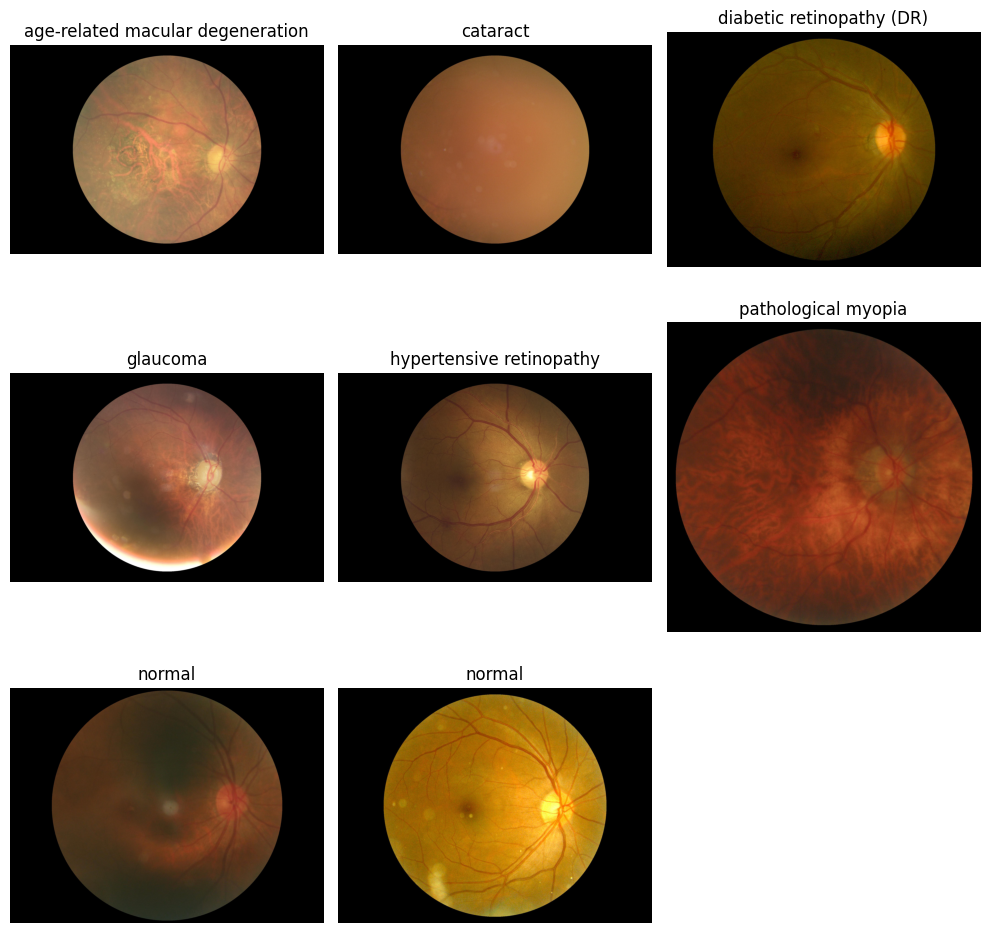

In [46]:
import matplotlib.pyplot as plt
from PIL import Image

images = [
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/43_right.jpg', 'age-related macular degeneration'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/24_right.jpg', 'cataract'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/2_right.jpg', 'diabetic retinopathy (DR)'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/167_right.jpg', 'glaucoma'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/23_right.jpg', 'hypertensive retinopathy'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/13_right.jpg', 'pathological myopia'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/0_right.jpg', 'normal'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/9_right.jpg', 'normal')
]

plt.figure(figsize=(10, 10))

for i, (img_path, title) in enumerate(images):
    img = Image.open(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

plt.tight_layout()
plt.show()


In [28]:
image_folder = '/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/'

image_sizes = {}

for image_file in os.listdir(image_folder):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, image_file)
        
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes[image_file] = (width, height)

for image, size in image_sizes.items():
    print(f"{image}: {size[0]}x{size[1]} pixels")


261_left.jpg: 2584x2000 pixels
2342_left.jpg: 1956x1934 pixels
806_right.jpg: 2592x1728 pixels
4227_right.jpg: 2976x2976 pixels
2124_left.jpg: 2736x1824 pixels
1402_right.jpg: 2304x1728 pixels
201_right.jpg: 2400x2400 pixels
2125_left.jpg: 2736x1824 pixels
1919_right.jpg: 2592x1728 pixels
4011_right.jpg: 2592x1728 pixels
3407_right.jpg: 1956x1934 pixels
260_left.jpg: 2976x1984 pixels
2343_left.jpg: 2584x2000 pixels
4682_right.jpg: 2592x1728 pixels
4485_left.jpg: 1936x1296 pixels
4361_right.jpg: 2196x1958 pixels
3294_right.jpg: 2048x1536 pixels
940_right.jpg: 2048x1536 pixels
1443_left.jpg: 3264x2448 pixels
989_right.jpg: 2960x2935 pixels
1258_right.jpg: 2560x1920 pixels
859_left.jpg: 1936x1296 pixels
1291_right.jpg: 2992x2000 pixels
171_right.jpg: 2592x1728 pixels
492_right.jpg: 3264x2448 pixels
1442_left.jpg: 2992x2000 pixels
1624_left.jpg: 1956x1934 pixels
4484_left.jpg: 1444x1444 pixels
347_right.jpg: 1536x1152 pixels
858_left.jpg: 2592x1728 pixels
1544_right.jpg: 2592x1728 pixels
2

In [30]:
input_folder = '/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/'
output_folder = '/Users/priyankapalaniselvam/Downloads/RetinaNet/classifier_one_data/ODIR-5K/ODIR-5K/Training Images/cropped/'
target_width = 1024  

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        height = int(img.shape[0] * (target_width / img.shape[1]))
        new_size = (target_width, height)

        resized_img = cv2.resize(img, new_size)

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_img)

print("Resizing completed!")


Resizing completed!


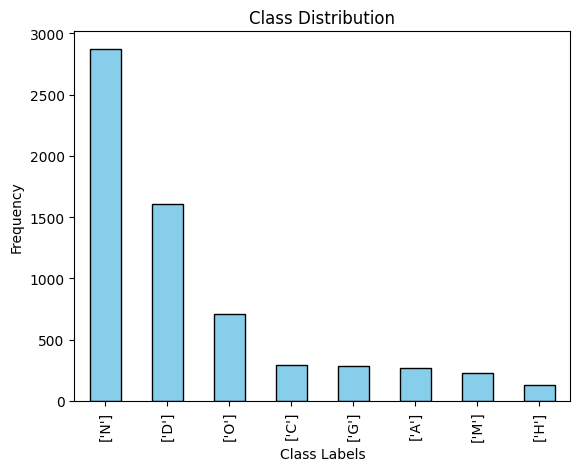

Class Weights: {"['N']": 0.2781065088757396, "['D']": 0.4968905472636816, "['O']": 1.1285310734463276, "['M']": 3.4439655172413794, "['H']": 6.2421875, "['C']": 2.726962457337884, "['A']": 3.0037593984962405, "['G']": 2.813380281690141}


In [31]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter


labels_df = pd.read_csv("/Users/priyankapalaniselvam/Downloads/classifier_one_data/full_df.csv")
label_counts = labels_df['labels'].value_counts()
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

classes = labels_df['labels'].unique()
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=labels_df['labels'])
class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)


*Inference*
- Tried to undersample the dataset by making all the classes having the same number of images. But the accuracy dropped because of the data loss.


# Channel Mean and Standard Deviation

# Color Histograms and Grayscale Check

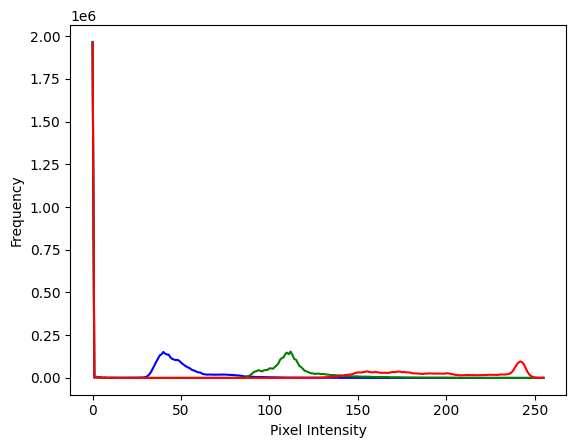

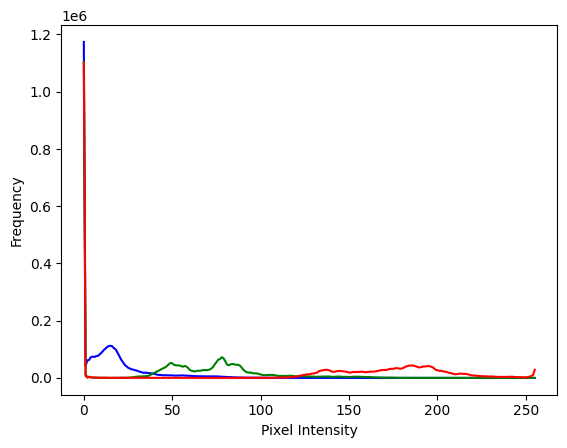

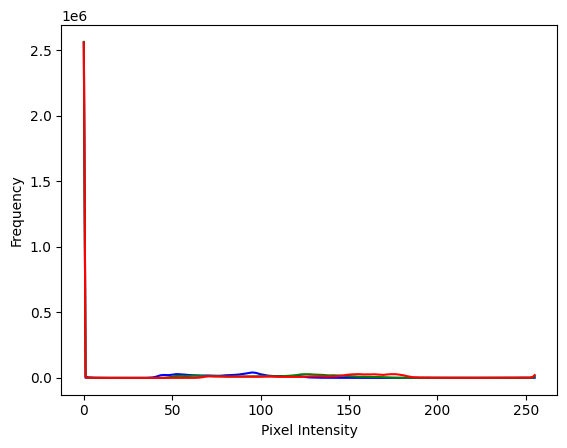

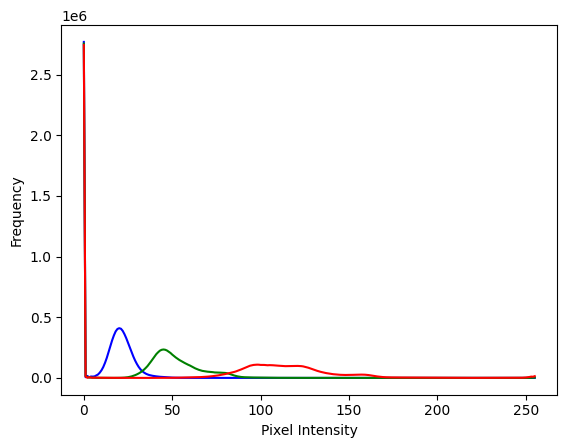

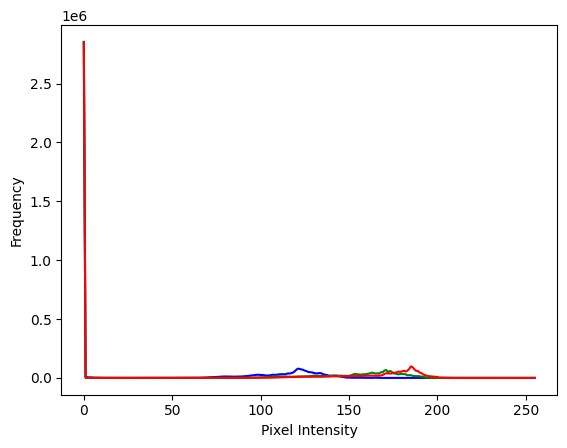

Number of grayscale images: 0


In [34]:
def plot_color_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

for filename in os.listdir(input_folder)[:5]:  
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)
    if img is not None:
        plot_color_histogram(img)
        
gray_count = sum([1 for filename in os.listdir(input_folder) 
                  if filename.endswith(('.jpg', '.jpeg', '.png')) and 
                  cv2.imread(os.path.join(input_folder, filename)).shape[2] == 1])

print(f"Number of grayscale images: {gray_count}")


# Blur Detection using Variance of Laplacian

In [35]:
def detect_blur(image, threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance < threshold

blurred_images = []

for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)

    if img is not None:
        if detect_blur(img):
            blurred_images.append(filename)

print("Number of blurred images:", len(blurred_images))
print("Blurred image examples:", blurred_images[:5])


Number of blurred images: 6016
Blurred image examples: ['261_left.jpg', '2342_left.jpg', '4227_right.jpg', '2124_left.jpg', '1402_right.jpg']


Dataset exploration

In [36]:
df.columns


Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [39]:
if 'ID' in df.columns:   
    df=df.drop('ID',axis=1)

df['Patient Sex'].value_counts()


Patient Sex
Male      3424
Female    2968
Name: count, dtype: int64

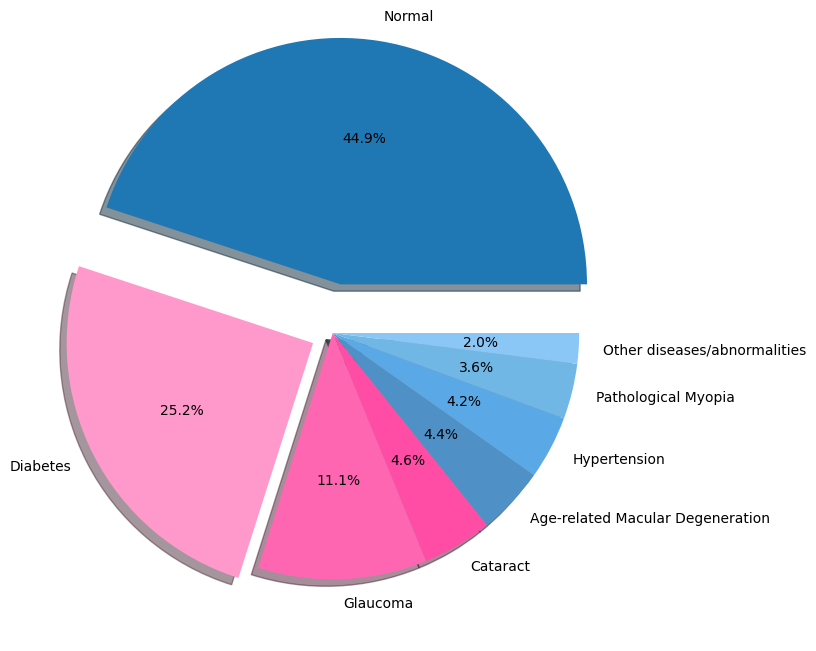

In [42]:
import matplotlib.pyplot as plt

colors = [
    '#1f77b4',  
    '#ff99cc',  
    '#ff66b2',  
    '#ff4da6',  
    '#4f91c6',  
    '#5aa9e6',  
    '#70b7e6',  
    '#8ac7f7'
]

plt.figure(figsize=(8, 8))
plt.pie(
    df['labels'].value_counts(),
    autopct="%0.1f%%",
    labels=['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 
            'Age-related Macular Degeneration', 'Hypertension',
            'Pathological Myopia', 'Other diseases/abnormalities'],
    shadow=True,
    explode=[0.2, 0.09, 0, 0, 0, 0, 0, 0],
    colors=colors
)

plt.show()


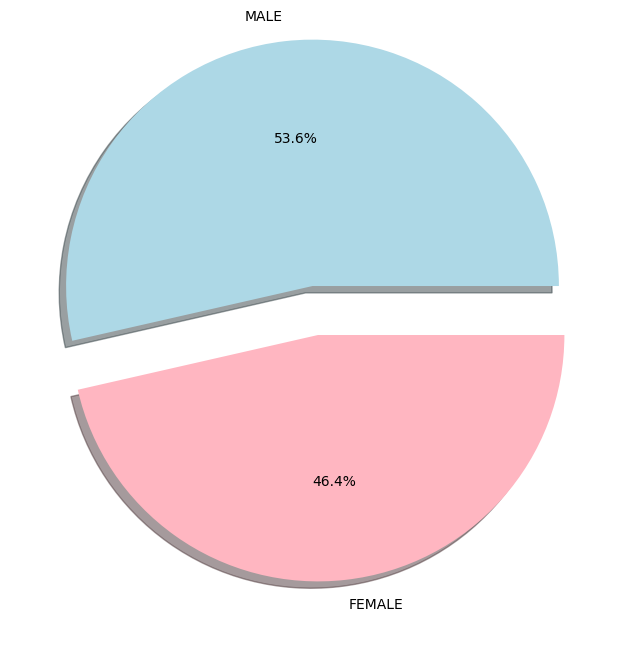

In [45]:
import matplotlib.pyplot as plt

colors = ['#add8e6', '#ffb6c1']  

plt.figure(figsize=(8, 8))
plt.pie(
    df['Patient Sex'].value_counts(),
    labels=["MALE", "FEMALE"],
    autopct="%0.1f%%",
    shadow=True,
    explode=[0.2, 0],  
    colors=colors
)

plt.show()
